<a href="https://colab.research.google.com/github/SomeshRao007/PROACTIVE-AUTOSCALING-FOR-HIGH-WEB-TRAFFIC-ENVIRONMENTS-A-TRANSFORMERS-BASED-APPROACH/blob/main/NASA_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from numpy import log


print(os.listdir(r"/content/drive/MyDrive/Colab_Notebooks/"))

['access_log_Jul95.csv', 'access_log_Aug95.csv', 'Somewhat_Homomorphic_Encryption_Toy.ipynb', 'NETPIE2020_Pub_Sub_demo.ipynb', 'nasa-access-log (1).ipynb', 'Untitled0.ipynb', 'nasa-access-log.ipynb', 'NASAD1.csv', 'NASAD5.csv', 'NASA DATASET.ipynb - Colaboratory.pdf', 'NASA_DS_countPri.csv', 'Transformers', 'NASA_DS_count_RF.csv', 'NASA July ARIMA.ipynb', 'NASA_DS_count_ARIMA.csv', 'NASA_DS_count.csv']


In [ ]:
!pip install scikit-learn
!pip install skforecast
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 424.8/424.8 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.6/409.6 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.8/226.8 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 10.0 MB/s eta 0:00:00


In [ ]:
# Data processing
# ==============================================================================
import numpy as np
import pandas as pd

# Plots
# ==============================================================================
import matplotlib.pyplot as plt
import seaborn as sns
#import hvplot.pandas
%matplotlib inline
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 1.5
plt.rcParams['font.size'] = 10

# Modelling and forecasting
# ==============================================================================
!pip install scikit-forecast
import skforecast

from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.model_selection import grid_search_forecaster
from skforecast.model_selection import backtesting_forecaster
from skforecast.ForecasterSarimax import ForecasterSarimax
from skforecast.model_selection_sarimax import backtesting_sarimax
from skforecast.model_selection_sarimax import grid_search_sarimax

from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from pmdarima import ARIMA

# Warnings config
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

ERROR: Could not find a version that satisfies the requirement scikit-forecast (from versions: none)
ERROR: No matching distribution found for scikit-forecast


In [ ]:
# Libraries
# ======================================================================================
import numpy as np
import pandas as pd
from io import StringIO
import contextlib
import re
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-darkgrid')

# pmdarima
from pmdarima import ARIMA
from pmdarima import auto_arima

# statsmodels
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

# skforecast
from skforecast.Sarimax import Sarimax
from skforecast.ForecasterSarimax import ForecasterSarimax
from skforecast.model_selection_sarimax import backtesting_sarimax
from skforecast.model_selection_sarimax import grid_search_sarimax
from sklearn.metrics import mean_absolute_error

import warnings

In [ ]:
from numpy import asarray
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot

In [ ]:
import pandas as pd
import numpy as np

def process_csv_file(file_path, nRowsRead=None):
    # Read the CSV file
    df = pd.read_csv(file_path, delimiter=' ', nrows=nRowsRead, header=None, names=np.arange(11), encoding_errors='ignore')

    # Drop unnecessary columns
    df.drop(df.columns[[1, 2, 4, 8, 9, 10]], axis=1, inplace=True)

    # Rename columns
    df.columns = ['IP', 'Timestamp', 'Request', 'Response', 'DurationServed']

    # Extract HTTP Method
    df['HTTP Method'] = df['Request'].str.extract(r'^(GET|POST|PUT|DELETE)')

    # Remove HTTP Method from Request
    df['Request'] = df['Request'].str.replace(r'^(GET|POST|PUT|DELETE)\s+', '')

    return df

# Read the CSV file
file_path = "/content/drive/MyDrive/Colab_Notebooks/access_log_Jul95.csv"
df = process_csv_file(file_path)

# Convert Timestamp to datetime and set as index
df['Timestamp'] = pd.to_datetime(df['Timestamp'].str.replace('[','').str.replace('?',''), format='%d/%b/%Y:%H:%M:%S')
df = df.set_index('Timestamp')

# Resample and count responses
df = df.resample('1T').count()

# # Keep only the 'Response' column
# df_resampled = df_resampled[['Response']]

# Reset index to make 'Timestamp' a column
# df_final = df_resampled.reset_index()
df.drop(df.columns[[0,1,3,4]], axis=1, inplace=True)

df = df.reset_index()
# Display the first 5 rows
# df_final.head(5)
# df.to_csv("/content/drive/MyDrive/Colab_Notebooks/NASA_DS_count.csv", encoding ='utf-8',index= False)

In [ ]:
df.to_csv("/content/drive/MyDrive/Colab_Notebooks/NASA_DS_count_RF.csv", encoding ='utf-8',index= False)

df.head()


,Timestamp,Response
0,1995-07-01 00:00:00,42
1,1995-07-01 00:01:00,61
2,1995-07-01 00:02:00,57
3,1995-07-01 00:03:00,71
4,1995-07-01 00:04:00,70


In [ ]:
# # Import necessary libraries
# import pandas as pd
# from statsmodels.tsa.statespace.sarimax import SARIMAX
# from sklearn.metrics import mean_absolute_error
# import warnings

# # # Load data and ensure the index is of datetime type
# df = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/NASA_DS_count_RF.csv',  parse_dates=True)
# df['Timestamp'] = pd.to_datetime(df['Timestamp'])
# df.set_index('Timestamp', inplace=True)
# df.sort_index(inplace=True)

# # # Exclude weekends
# df = df[df.index.dayofweek < 5]

# # Find the last Friday in the dataset
# last_friday = df[df.index.dayofweek == 4].index.max()

# # Calculate the start of the last week of data (5 business days before the last Friday)
# start_of_last_week = last_friday - pd.Timedelta(days=4)

# # Split the data into train and test
# data_train = df[:start_of_last_week]
# data_test = df[start_of_last_week:last_friday + pd.Timedelta(days=1)]



# print (data_train)
# print(data_test)

# print(f"Training dates   : {data_train.index.min()} --- {data_train.index.max()}  (n={len(data_train)})")
# # print(f"Validation dates : {data_val.index.min()} --- {data_val.index.max()}  (n={len(data_val)})")
# print(f"Test dates       : {data_test.index.min()} --- {data_test.index.max()}  (n={len(data_test)})")

                     Response
Timestamp                    
1995-07-03 00:00:00        26
1995-07-03 00:01:00        28
1995-07-03 00:02:00        49
1995-07-03 00:03:00        47
1995-07-03 00:04:00        49
...                       ...
1995-07-24 13:28:00        64
1995-07-24 13:29:00        81
1995-07-24 13:30:00        74
1995-07-24 13:31:00        88
1995-07-24 13:32:00        89

[22413 rows x 1 columns]
                     Response
Timestamp                    
1995-07-24 13:32:00        89
1995-07-24 13:33:00        98
1995-07-24 13:34:00        76
1995-07-24 13:35:00       105
1995-07-24 13:36:00        86
...                       ...
1995-07-28 13:28:00        64
1995-07-28 13:29:00        91
1995-07-28 13:30:00        75
1995-07-28 13:31:00        92
1995-07-28 13:32:00        42

[5761 rows x 1 columns]
Training dates   : 1995-07-03 00:00:00 --- 1995-07-24 13:32:00  (n=22413)
Test dates       : 1995-07-24 13:32:00 --- 1995-07-28 13:32:00  (n=5761)


In [ ]:
# Import necessary libraries
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error
import warnings

# # Load data and ensure the index is of datetime type
df = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/NASA_DS_count_RF.csv',  parse_dates=True)
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df.set_index('Timestamp', inplace=True)
df.sort_index(inplace=True)

# # Exclude weekends
# df = df[df.index.dayofweek < 5]

# # Find the last Friday in the dataset
# last_friday = df[df.index.dayofweek == 4].index.max()

# # Calculate the start of the last week of data (5 business days before the last Friday)
# start_of_last_week = last_friday - pd.Timedelta(days=4)

# # Split the data into train and test
# data_train = df[:start_of_last_week]
# data_test = df[start_of_last_week:last_friday + pd.Timedelta(days=1)]

# Filter out weekends for training data
df_train_val = df[df.index.dayofweek < 5]

# Identify the last data point for the training set (July 21st, 1995)
end_train = pd.Timestamp('1995-07-21')

# Identify the start and end points for the validation set (July 22nd to July 24th, 1995)
start_validation = pd.Timestamp('1995-07-22')
end_validation = pd.Timestamp('1995-07-24')

# Split the data into train, validation, and test sets
data_train = df_train_val[:end_train]
data_val = df[start_validation:end_validation]
data_test = df[end_validation + pd.Timedelta(days=1):]

print (data_train)
print(data_test)

print(f"Training dates   : {data_train.index.min()} --- {data_train.index.max()}  (n={len(data_train)})")
print(f"Validation dates : {data_val.index.min()} --- {data_val.index.max()}  (n={len(data_val)})")
print(f"Test dates       : {data_test.index.min()} --- {data_test.index.max()}  (n={len(data_test)})")

                     Response
Timestamp                    
1995-07-03 00:00:00        26
1995-07-03 00:01:00        28
1995-07-03 00:02:00        49
1995-07-03 00:03:00        47
1995-07-03 00:04:00        49
...                       ...
1995-07-20 23:56:00        74
1995-07-20 23:57:00        59
1995-07-20 23:58:00        73
1995-07-20 23:59:00        47
1995-07-21 00:00:00        29

[20161 rows x 1 columns]
                     Response
Timestamp                    
1995-07-25 00:00:00        52
1995-07-25 00:01:00        44
1995-07-25 00:02:00        30
1995-07-25 00:03:00        21
1995-07-25 00:04:00        26
...                       ...
1995-07-28 13:28:00        64
1995-07-28 13:29:00        91
1995-07-28 13:30:00        75
1995-07-28 13:31:00        92
1995-07-28 13:32:00        42

[5133 rows x 1 columns]
Training dates   : 1995-07-03 00:00:00 --- 1995-07-21 00:00:00  (n=20161)
Validation dates : 1995-07-22 00:00:00 --- 1995-07-24 00:00:00  (n=2881)
Test dates       : 199

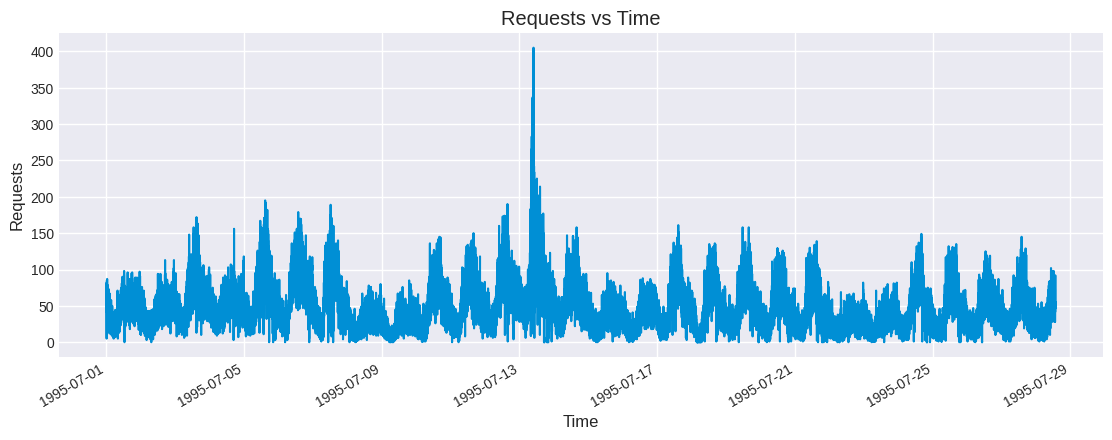

In [ ]:
import matplotlib.pyplot as plt

# Set the size of the plot
plt.figure(figsize=(12, 4))

# Plot the 'Response' column against the 'Timestamp' column
plt.plot( df['Response'])

# Rotate the x-axis labels for better readability
plt.xticks(rotation=30, ha='right')

# Add labels and title
plt.xlabel('Time')
plt.ylabel('Requests')
plt.title('Requests vs Time')

# Show the plot
plt.show()


In [ ]:

# # Split data: train-validation-test
# # ==============================================================================
# # Assuming df_final is your DataFrame

# # Define the ratio for splitting
# train_ratio = 0.7
# validation_ratio = 0.15
# test_ratio = 0.15

# # Calculate the indices for splitting
# train_end = int(len(df_final) * train_ratio)
# validation_end = int(len(df_final) * (train_ratio + validation_ratio))

# # Split the data
# train_data = df_final[:train_end]
# val_data = df_final[train_end:validation_end]
# test_data = df_final[validation_end:]

# # You can now use train_data, validation_data, and test_data for your model training and evaluation

# print (test_data)
# print(f"Training dates   : {train_data.index.min()} --- {train_data.index.max()}  (n={len(train_data)})")
# print(f"Validation dates : {val_data.index.min()} --- {val_data.index.max()}  (n={len(val_data)})")
# print(f"Test dates       : {test_data.index.min()} --- {test_data.index.max()}  (n={len(test_data)})")

In [ ]:
# # Splitting the dataset
# n_test = int(len(data) * 0.2)  # 20% for testing
# train, test = data.iloc[:-n_test, :], data.iloc[-n_test:, :]


In [ ]:
# def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
#     n_vars = 1 if type(data) is list else data.shape[1]
#     df = DataFrame(data)
#     cols = list()
#     # input sequence (t-n, ... t-1)
#     for i in range(n_in, 0, -1):
#         cols.append(df.shift(i))
#     # forecast sequence (t, t+1, ... t+n)
#     for i in range(0, n_out):
#         cols.append(df.shift(-i))
#     # put it all together
#     agg = concat(cols, axis=1)
#     # drop rows with NaN values
#     if dropnan:
#         agg.dropna(inplace=True)
#     return agg.values

In [ ]:
import pandas as pd

def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    df = pd.DataFrame(data)
    cols, names = list(), list()

    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (1, i))]

    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % 1)]
        else:
            names += [('var%d(t+%d)' % (1, i))]

    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names

    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)

    return agg

In [ ]:
# Splitting the dataset
n_test = int(len(df)*0.2)
# train, test = df.iloc[:-n_test, :], df.iloc[-n_test:, :]


# print(n_test)

# print("Train size:", len(train))
# print("Test size:", len(test))



In [ ]:
# n_test = int(len(data_train))
# print(n_test)

In [ ]:
# split a univariate dataset into train/test sets
def train_test_split(data, n_test):
    return data.iloc[:-n_test, :], data.iloc[-n_test:, :]

# print()

In [ ]:

def walk_forward_validation(data, n_test):
    predictions = list()
    # split dataset
    data_train, data_test = train_test_split(data, n_test)
    # seed history with training dataset
    history = data_train.copy()
    # step over each time-step in the test set
    for i in range(len(data_test)):
        # split test row into input and output columns
        testX, testy = data_test.iloc[i, :-1], data_test.iloc[i, -1]
        # fit model on history and make a prediction
        yhat = random_forest_forecast(history, testX)
        # store forecast in list of predictions
        predictions.append(yhat)
        # add actual observation to history for the next loop
        history = history.append(data_test.iloc[i])
        # summarize progress
        print('>expected=%.1f, predicted=%.1f' % (testy, yhat))
    # estimate prediction error
    error = mean_absolute_error(data_test.iloc[:, -1], predictions)
    return error, data_test.iloc[:, -1], predictions



In [ ]:
# from sklearn.metrics import mean_absolute_error

# # ...

# def walk_forward_validation(data, n_test):
#     predictions = list()
#     # split dataset
#     train, test = train_test_split(data, n_test)
#     # seed history with training dataset
#     history = train.copy()
#     # step over each time-step in the test set
#     absolute_errors = []
#     for i in range(len(test)):
#         # split test row into input and output columns
#         testX, testy = test.iloc[i, :-1], test.iloc[i, -1]
#         # fit model on history and make a prediction
#         yhat = random_forest_forecast(history, testX)
#         # calculate absolute error
#         absolute_error = abs(testy - yhat)
#         # store absolute error in list
#         absolute_errors.append(absolute_error)
#         # store forecast in list of predictions
#         predictions.append(yhat)
#         # add actual observation to history for the next loop
#         history = history.append(test.iloc[i])

#         # summarize progress
#         print('>expected=%.1f, predicted=%.1f, absolute error=%.1f' % (testy, yhat, absolute_error))

#     # calculate mean absolute percentage error (MAPE)
#     mape = sum(absolute_errors) / sum(test.iloc[:, -1])
#     return mape, test.iloc[:, -1], predictions


In [ ]:
# # fit an random forest model and make a one step prediction
# def random_forest_forecast(train, testX):
#     # transform list into array
#     train = asarray(data_train)
#     # split into input and output columns
#     trainX, trainy = train[:, :-1], train[:, -1]
#     # fit model
#     model = RandomForestRegressor(n_estimators=10)
#     model.fit(trainX, trainy)
#     # make a one-step prediction
#     yhat = model.predict([testX])
#     return yhat[0]

In [ ]:
def random_forest_forecast(train, testX):
    # transform list into array
    train = asarray(train)
    # split into input and output columns
    trainX, trainy = train[:, :-1], train[:, -1]
    # fit model
    model = RandomForestRegressor(n_estimators=1)
    model.fit(trainX, trainy)
    # make a one-step prediction
    yhat = model.predict([testX])
    return yhat[0]


In [ ]:
# # # # evaluate
# # # mae, y, yhat = walk_forward_validation(data, 12)
# # # print('MAE: %.3f' % mae)


# # data = series_to_supervised(df['Response'], n_in=6)  # Change 'Response' to the column you want to predict

# # n_test = int(len(data) * 0.2)  # Example: 20% for testing
# # train, test = data[:-n_test], data[-n_test:]

# # # Evaluate the model
# # mae, y, yhat = walk_forward_validation(data, n_test)
# # print('MAE: %.3f' % mae)


In [ ]:
# def convert_timestamps(data):
#     for col in df.Timestamp:
#         if pd.api.types.is_datetime64_any_dtype(data[col]):
#             # Convert to Unix time (seconds since epoch)
#             data[col] = data[col].astype(np.int64) // 10**9
#     return data


# df.Timestamp = convert_timestamps(df.Timestamp)

In [ ]:
# data = series_to_supervised(df['Response'], n_in=6)
# # Assuming your timestamp is in a column named 'timestamp'
# # df['Timestamp'] = df['Timestamp'].apply(lambda x: x.timestamp())

# # Perform walk-forward validation
# test_error, actual_values, predictions = walk_forward_validation(data_train, n_test)

# # Print actual and predicted values
# for actual, predicted in zip(actual_values, predictions):
#     print(f'Actual: {actual}, Predicted: {predicted}')

# # Calculate and print mean absolute error
# mae = mean_absolute_error(actual_values, predictions)
# print(f'Mean Absolute Error: {mae}')





# Convert series to supervised
data_train_supervised = series_to_supervised(data_train['Response'], n_in=60)
data_test_supervised = series_to_supervised(data_test['Response'], n_in=6)

# Perform walk-forward validation
test_error, actual_values, predictions = walk_forward_validation(data_train_supervised, n_test)

# Print actual and predicted values
for actual, predicted in zip(actual_values, predictions):
    print(f'Actual: {actual}, Predicted: {predicted}')

# Calculate and print mean absolute error
mae = mean_absolute_error(actual_values, predictions)
print(f'Mean Absolute Error: {mae}')






# # ...

# # Perform walk-forward validation
# mape, actual_values, predictions = walk_forward_validation(data, n_test)

# # Print actual and predicted values
# for actual, predicted in zip(actual_values, predictions):
#     print(f'Actual: {actual}, Predicted: {predicted}')

# # Calculate and print Mean Absolute Percentage Error (MAPE)
# print(f'Mean Absolute Percentage Error (MAPE): {mape * 100:.2f}%')


Streaming output truncated to the last 5000 lines.
Actual: 102, Predicted: 116.0
Actual: 109, Predicted: 91.0
Actual: 38, Predicted: 125.0
Actual: 23, Predicted: 69.0
Actual: 15, Predicted: 55.0
Actual: 37, Predicted: 1.0
Actual: 47, Predicted: 70.0
Actual: 88, Predicted: 84.0
Actual: 73, Predicted: 64.0
Actual: 39, Predicted: 64.0
Actual: 82, Predicted: 67.0
Actual: 76, Predicted: 93.0
Actual: 104, Predicted: 53.0
Actual: 74, Predicted: 77.0
Actual: 95, Predicted: 97.0
Actual: 104, Predicted: 54.0
Actual: 96, Predicted: 82.0
Actual: 65, Predicted: 101.0
Actual: 85, Predicted: 72.0
Actual: 86, Predicted: 100.0
Actual: 100, Predicted: 79.0
Actual: 86, Predicted: 82.0
Actual: 79, Predicted: 116.0
Actual: 91, Predicted: 65.0
Actual: 81, Predicted: 107.0
Actual: 65, Predicted: 99.0
Actual: 96, Predicted: 60.0
Actual: 66, Predicted: 83.0
Actual: 56, Predicted: 78.0
Actual: 61, Predicted: 79.0
Actual: 62, Predicted: 83.0
Actual: 75, Predicted: 71.0
Actual: 79, Predicted: 77.0
Actual: 113, Pr

In [ ]:
# Print actual and predicted values
for actual, predicted in zip(actual_values, predictions):
    print(f'Actual: {actual}, Predicted: {predicted}')

# Calculate and print mean absolute error
mae = mean_absolute_error(actual_values, predictions)
print(f'Mean Absolute Error: {mae}')

mse, actual_values, predictions = walk_forward_validation(data_train_supervised, n_test)
# Calculate and print Mean Squared Error (MSE)
print(f'Mean Squared Error (MSE): {mse:.2f}')

Streaming output truncated to the last 5000 lines.
>expected=102.0, predicted=95.0
>expected=109.0, predicted=68.0
>expected=38.0, predicted=84.0
>expected=23.0, predicted=110.0
>expected=15.0, predicted=63.0
>expected=37.0, predicted=12.0
>expected=47.0, predicted=52.0
>expected=88.0, predicted=39.0
>expected=73.0, predicted=78.0
>expected=39.0, predicted=98.0
>expected=82.0, predicted=42.0
>expected=76.0, predicted=70.0
>expected=104.0, predicted=90.0
>expected=74.0, predicted=116.0
>expected=95.0, predicted=75.0
>expected=104.0, predicted=107.0
>expected=96.0, predicted=59.0
>expected=65.0, predicted=115.0
>expected=85.0, predicted=95.0
>expected=86.0, predicted=86.0
>expected=100.0, predicted=73.0
>expected=86.0, predicted=93.0
>expected=79.0, predicted=68.0
>expected=91.0, predicted=119.0
>expected=81.0, predicted=61.0
>expected=65.0, predicted=76.0
>expected=96.0, predicted=84.0
>expected=66.0, predicted=97.0
>expected=56.0, predicted=59.0
>expected=61.0, predicted=110.0
>expecte

In [ ]:

mse, actual_values, predictions = walk_forward_validation(data_test_supervised, n_test)
# Calculate and print Mean Squared Error (MSE)
print(f'Mean Squared Error (MSE): {mse:.2f}')

ValueError: ignored

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Assuming 'actual_values' and 'predictions' are lists or numpy arrays
actual_values_series = pd.Series(actual_values, index=data_train_supervised.index)
predictions_series = pd.Series(predictions, index=data_train_supervised.index)

plt.figure(figsize=(12, 6))
plt.plot(actual_values_series.index, actual_values_series, label='Expected')
plt.plot(predictions_series.index, predictions_series, label='Predicted', alpha=0.7)

# ... rest of your plotting code


plt.title('Expected vs Predicted Values')
plt.xlabel('Time')
plt.ylabel('Response')
plt.legend()

# Format the x-axis to show the timestamp properly
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S'))
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())

plt.xticks(rotation=45) # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent clipping of tick-labels
plt.show()


ValueError: ignored

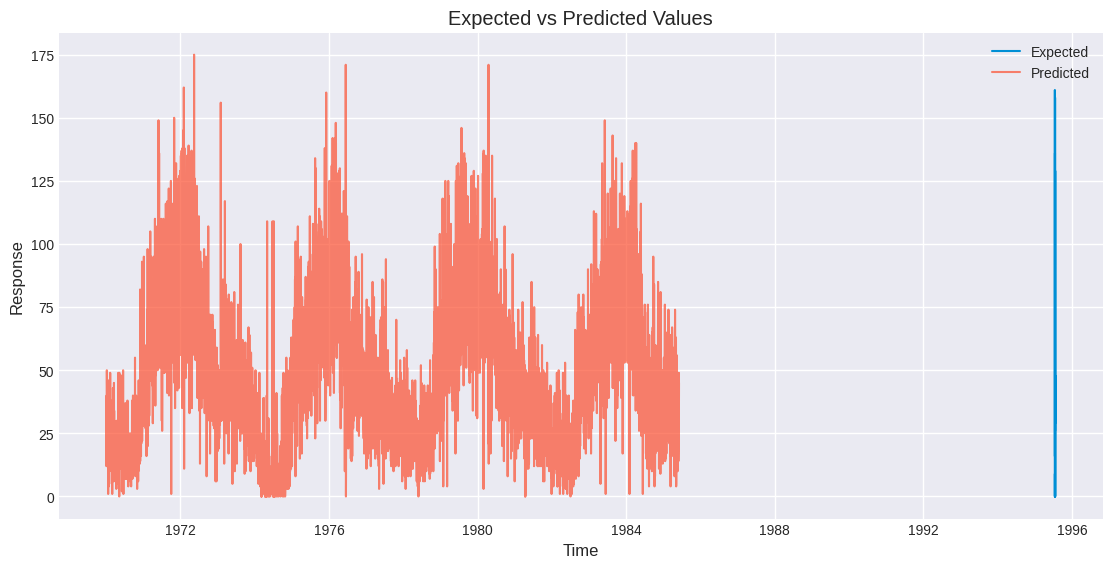

In [ ]:
# Plotting

# df['Timestamp'] = df['Timestamp'].apply(lambda x: x.timestamp())
plt.figure(figsize=(12, 6))
# plt.plot(df.Response, label='Expected')
plt.plot(actual_values, label='Expected')
plt.plot(predictions, label='Predicted', alpha=0.7)

plt.title('Expected vs Predicted Values')
plt.xlabel('Time')
plt.ylabel('Response')
plt.legend()
plt.show()

Timestamp
1995-07-17 02:07:00    16
1995-07-17 02:08:00    30
1995-07-17 02:09:00    17
1995-07-17 02:10:00    15
1995-07-17 02:11:00    26
                       ..
1995-07-20 23:56:00    74
1995-07-20 23:57:00    59
1995-07-20 23:58:00    73
1995-07-20 23:59:00    47
1995-07-21 00:00:00    29
Name: var1(t), Length: 5634, dtype: int64
[18.0, 27.0, 19.0, 12.0, 26.0, 40.0, 21.0, 50.0, 43.0, 28.0, 16.0, 26.0, 42.0, 15.0, 32.0, 28.0, 37.0, 14.0, 15.0, 34.0, 1.0, 11.0, 25.0, 19.0, 14.0, 46.0, 4.0, 22.0, 18.0, 23.0, 16.0, 12.0, 37.0, 19.0, 10.0, 37.0, 32.0, 17.0, 20.0, 25.0, 49.0, 25.0, 19.0, 30.0, 25.0, 29.0, 28.0, 16.0, 20.0, 26.0, 28.0, 19.0, 18.0, 11.0, 21.0, 37.0, 5.0, 35.0, 38.0, 36.0, 1.0, 15.0, 21.0, 21.0, 18.0, 21.0, 8.0, 43.0, 14.0, 16.0, 12.0, 12.0, 27.0, 25.0, 19.0, 22.0, 6.0, 45.0, 18.0, 34.0, 20.0, 24.0, 21.0, 13.0, 8.0, 14.0, 18.0, 18.0, 9.0, 17.0, 8.0, 16.0, 16.0, 9.0, 20.0, 15.0, 10.0, 16.0, 19.0, 16.0, 3.0, 26.0, 30.0, 25.0, 5.0, 17.0, 12.0, 10.0, 28.0, 22.0, 25.0, 26.0, 2

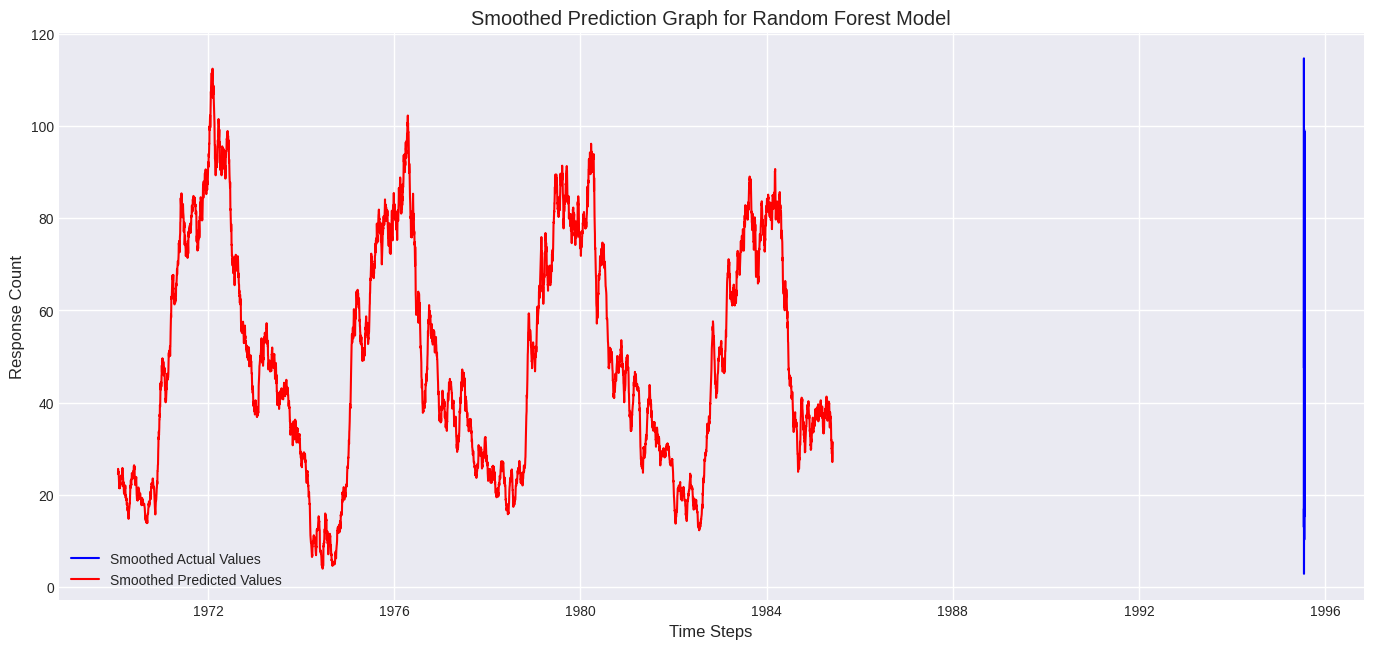

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# ... [Your existing code for Random Forest model prediction]

# Replace 'y_valid' and 'predictions' with the actual and predicted values from your model
y_valid = actual_values  # The actual values from the test set
prediction = predictions  # The predictions from your Random Forest model

# Convert to pandas Series for easy manipulation
actual_series = pd.Series(y_valid)

print(actual_series)
predicted_series = pd.Series(prediction)
print(prediction)



# Apply rolling average
rolling_window_size = 25  # Adjust this based on your data
smoothed_actual = actual_series.rolling(window=rolling_window_size).mean()
smoothed_predicted = predicted_series.rolling(window=rolling_window_size).mean()



print(smoothed_actual)
print(smoothed_predicted)

# Plot the smoothed values
plt.figure(figsize=(15, 7))
plt.plot(smoothed_actual, color='blue', label='Smoothed Actual Values')
plt.plot(smoothed_predicted, color='red', label='Smoothed Predicted Values')
plt.title('Smoothed Prediction Graph for Random Forest Model')
plt.xlabel('Time Steps')
plt.ylabel('Response Count')
plt.legend()
plt.show()


In [ ]:
print("Train size:", len(train))
print("Test size:", len(test))


In [ ]:
# Convert series to supervised
data_train_supervised = series_to_supervised(data_train['Response'], n_in=6)
data_test_supervised = series_to_supervised(data_test['Response'], n_in=6)
# n_test = int(len(df)*0.4)
# Perform walk-forward validation
test_error, actual_values, predictions = walk_forward_validation(data_test_supervised, n_test)

# Print actual and predicted values
for actual, predicted in zip(actual_values, predictions):
    print(f'Actual: {actual}, Predicted: {predicted}')

# Calculate and print mean absolute error
mae = mean_absolute_error(actual_values, predictions)
print(f'Mean Absolute Error: {mae}')

Streaming output truncated to the last 5000 lines.
Actual: 31, Predicted: 36.0
Actual: 30, Predicted: 10.0
Actual: 27, Predicted: 25.0
Actual: 32, Predicted: 61.0
Actual: 16, Predicted: 31.0
Actual: 32, Predicted: 52.0
Actual: 17, Predicted: 41.0
Actual: 27, Predicted: 36.0
Actual: 13, Predicted: 31.0
Actual: 26, Predicted: 13.0
Actual: 22, Predicted: 13.0
Actual: 17, Predicted: 26.0
Actual: 29, Predicted: 15.0
Actual: 31, Predicted: 18.0
Actual: 19, Predicted: 27.0
Actual: 12, Predicted: 24.0
Actual: 11, Predicted: 30.0
Actual: 25, Predicted: 26.0
Actual: 3, Predicted: 50.0
Actual: 10, Predicted: 0.0
Actual: 10, Predicted: 33.0
Actual: 18, Predicted: 13.0
Actual: 21, Predicted: 60.0
Actual: 19, Predicted: 36.0
Actual: 21, Predicted: 40.0
Actual: 10, Predicted: 16.0
Actual: 11, Predicted: 13.0
Actual: 18, Predicted: 10.0
Actual: 23, Predicted: 31.0
Actual: 10, Predicted: 26.0
Actual: 2, Predicted: 11.0
Actual: 4, Predicted: 1.0
Actual: 11, Predicted: 10.0
Actual: 9, Predicted: 42.0
Act

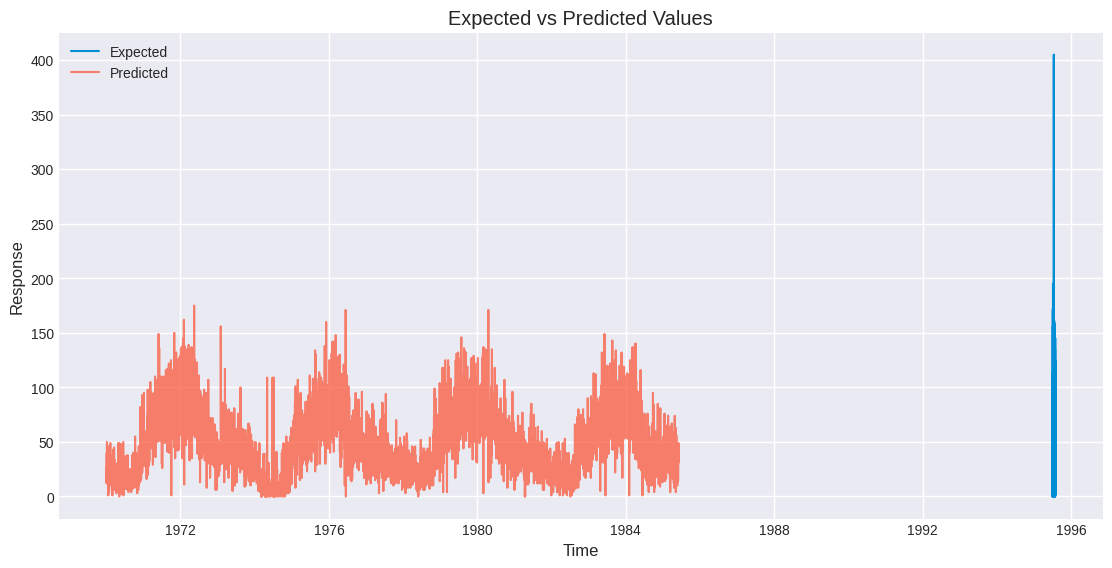

In [ ]:
plt.figure(figsize=(12, 6))
# plt.plot(df.Response, label='Expected')
plt.plot(df.Response, label='Expected')
plt.plot(predictions, label='Predicted', alpha=0.7)

plt.title('Expected vs Predicted Values')
plt.xlabel('Time')
plt.ylabel('Response')
plt.legend()
plt.show()

In [ ]:
# import pandas as pd
# from numpy import asarray
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import mean_absolute_error

# # Your existing functions for processing the CSV file and transforming it
# # ... (your process_csv_file and series_to_supervised functions here) ...

# # Function to split the dataset into train/test sets
# def train_test_split(data, n_test):
#     return data[:-n_test].values, data[-n_test:].values

# # Function to fit a Random Forest model and make a one-step prediction
# def random_forest_forecast(train, testX):
#     trainX, trainy = train[:, :-1], train[:, -1]
#     model = RandomForestRegressor(n_estimators=1000)
#     model.fit(trainX, trainy)
#     yhat = model.predict([testX])
#     return yhat[0]

# def walk_forward_validation(data, n_test):
#     predictions = list()
#     train, test = train_test_split(data, n_test)
#     history = np.array(train)
#     for i in range(len(test)):
#         testX, testy = test[i, :-1], test[i, -1]
#         yhat = random_forest_forecast(history, testX)
#         predictions.append(yhat)
#         history = np.vstack((history, test[i]))
#         print('>expected=%.1f, predicted=%.1f' % (testy, yhat))
#     error = mean_absolute_error(test[:, -1], predictions)
#     return error, test[:, -1], predictions


# def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
#     df = pd.DataFrame(data)
#     cols, names = list(), list()
#     for i in range(n_in, 0, -1):
#         cols.append(df.shift(i))
#         names += [('var%d(t-%d)' % (1, i))]
#     for i in range(0, n_out):
#         cols.append(df.shift(-i))
#         if i == 0:
#             names += [('var%d(t)' % 1)]
#         else:
#             names += [('var%d(t+%d)' % (1, i))]
#     agg = pd.concat(cols, axis=1)
#     agg.columns = names
#     if dropnan:
#         agg.dropna(inplace=True)
#     return agg

# # Main execution
# # ... Load and preprocess your dataset here ...
# df = process_csv_file(file_path)

# # Transform the data for supervised learning
# # Adjust the 'n_in' parameter as per the required number of lag observations
# transformed_df = series_to_supervised(df['Response'].values, n_in=6)

# # Split the dataset
# n_test = int(len(transformed_df) * 0.2)  # 20% for testing
# train, test = transformed_df[:-n_test], transformed_df[-n_test:]

# # Perform walk-forward validation
# error, actual, predicted = walk_forward_validation(train, n_test)
# print('MAE: %.3f' % error)

# # Making a new prediction (example)
# row = df['Response'].values[-6:].flatten()
# yhat = model.predict(asarray([row]))
# print('Predicted: %.3f' % yhat[0])
